In [42]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")


In [43]:
titanic = pd.read_csv('../input/train.csv')
titanic.head()

FileNotFoundError: File b'../input/train.csv' does not exist

In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Slocovski, Mr. Selman Francis",male,1601,B96 B98,S
freq,1,577,7,4,644


### Female and Male comparision on Titanic

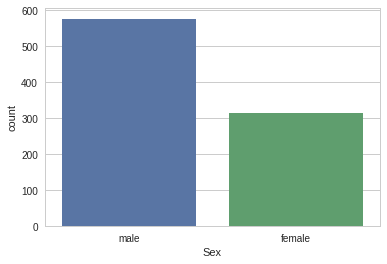

In [6]:
sns.countplot(titanic['Sex'])

### Male and Female in Pclass

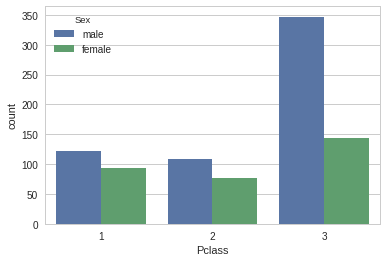

In [7]:
sns.countplot(titanic['Pclass'],hue=titanic['Sex'])

### Anyone under 16 years is considered as Child.

In [8]:
def child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex
titanic['person'] = titanic[['Age', 'Sex']].apply(child,axis=1)

In [9]:
titanic[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


### Male, Female, Child in Pclass

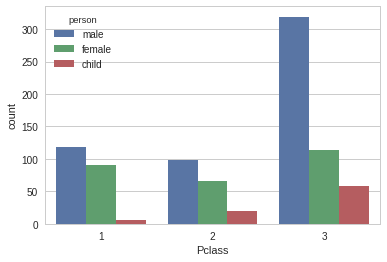

In [10]:
sns.countplot(titanic['Pclass'],hue=titanic['person'])

In [11]:
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### Removing Null Values from Cabin

In [12]:
deck = titanic["Cabin"].dropna()

In [13]:
deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

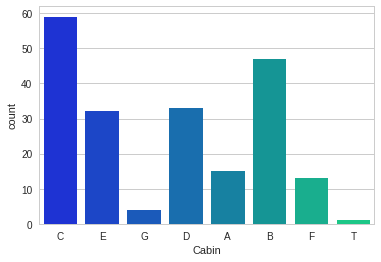

In [14]:
levels_list = []
for level in deck:
    levels_list.append(level[0])
cabin = DataFrame(levels_list)
cabin.columns = ['Cabin']
sns.countplot('Cabin',data=cabin,palette='winter')

### Comparision of Pclass and Embarked

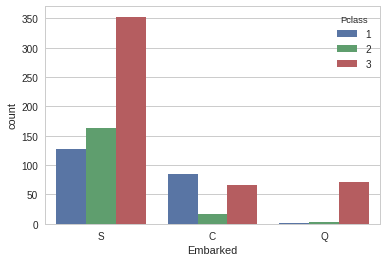

In [15]:
sns.countplot('Embarked',data=titanic,hue='Pclass')

### Seperating Family and Alone 

In [16]:
titanic["Alone"] = titanic.Parch + titanic.SibSp
titanic["Alone"].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [17]:
titanic["Alone"].loc[titanic["Alone"] != 0] = 'With Family'
titanic["Alone"].loc[titanic["Alone"] == 0] = 'Alone'

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


### Plotting Alone and With Family Members

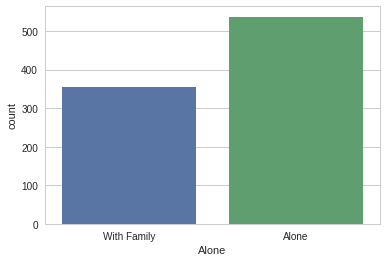

In [19]:
sns.countplot('Alone',data=titanic)

### People Who Survived and Who Didn't

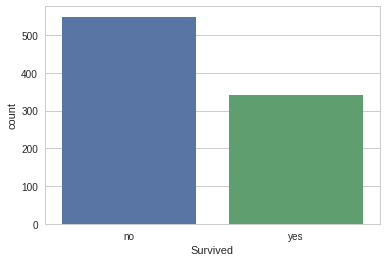

In [20]:
titanic["Survived"] = titanic.Survived.map({0: "no", 1: "yes"})
sns.countplot('Survived',data=titanic)

### Percentage of People who survived and who Didn't

In [21]:
titanic['Survived'].value_counts(normalize=True) * 100

no     61.616162
yes    38.383838
Name: Survived, dtype: float64

### How many Male and Female Survived the titanic

In [22]:
titanic[['Survived','Age']][0:10]

,Survived,Age
0,no,22.0
1,yes,38.0
2,yes,26.0
3,yes,35.0
4,no,35.0
5,no,NaN
6,no,54.0
7,no,2.0
8,yes,27.0
9,yes,14.0


(array([0, 1]), <a list of 2 Text yticklabel objects>)

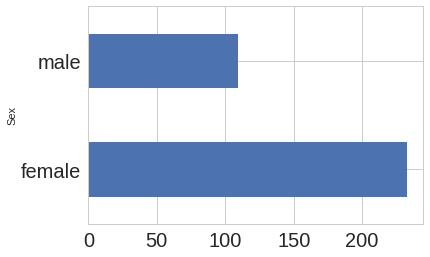

In [23]:
survived_yes = pd.crosstab(titanic.Sex,titanic.Survived)
survived_yes['yes'].plot.barh()
plt.xticks(size = 20)
plt.yticks(size = 20)


(array([0, 1]), <a list of 2 Text yticklabel objects>)

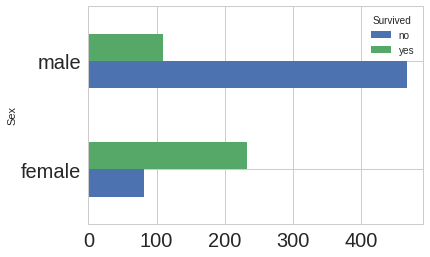

In [24]:
Survived_all = pd.crosstab(titanic.Sex,titanic.Survived)
Survived_all.plot.barh()
plt.xticks(size = 20)
plt.yticks(size = 20)

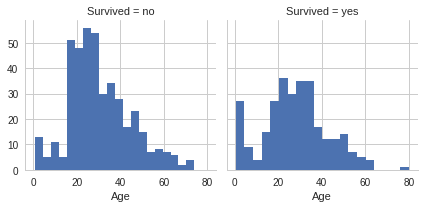

In [25]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Pclass and Survived

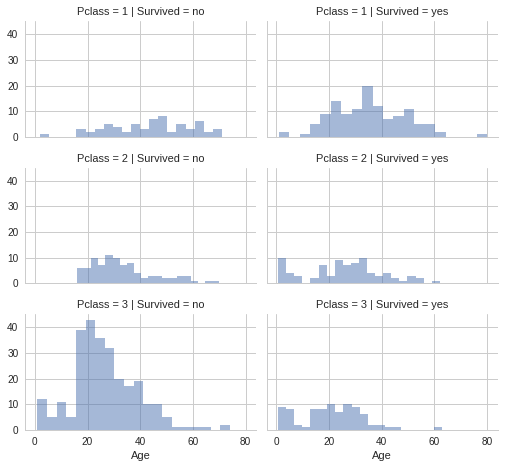

In [26]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Relation Between Pclass and Embarked

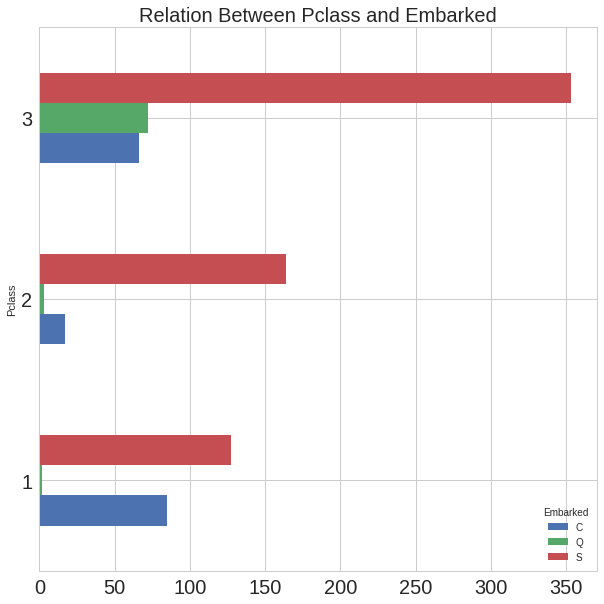

In [27]:
relation = pd.crosstab( titanic.Pclass, titanic.Embarked )
relation.plot.barh(figsize=(10,10))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title('Relation Between Pclass and Embarked',size=20)

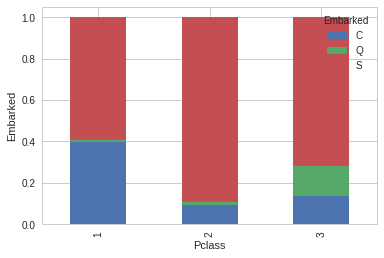

In [28]:
dummy = relation.div(relation.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Embarked')

### Sex and Pclass Relation 

AttributeError: Unknown property cmap

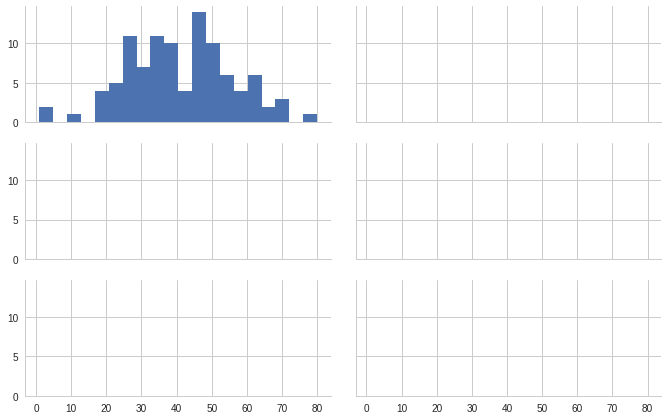

In [29]:
grid = sns.FacetGrid(titanic, row='Pclass', col='Sex', size=2.0, aspect=2.4)
grid.map(plt.hist, 'Age', bins=20,cmap='seismic')
grid.add_legend()

### People who survived in Pclass

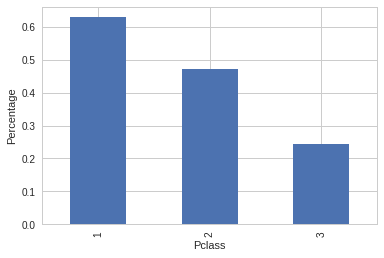

In [30]:
tab = pd.crosstab(titanic['Pclass'], titanic['Survived'])
dummy = tab['yes'].div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')


Survived   no  yes
Pclass            
1          80  136
2          97   87
3         372  119


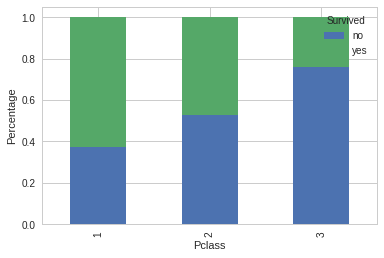

In [31]:
tab = pd.crosstab(titanic['Pclass'], titanic['Survived'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

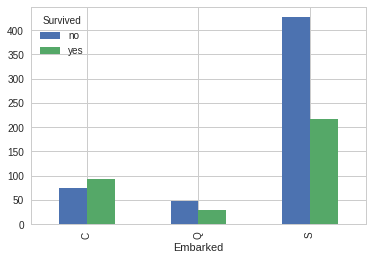

In [32]:
embarked_sur = pd.crosstab(titanic.Embarked,titanic.Survived)
embarked_sur.plot.bar()

### Null values 

In [33]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
person           0
Alone            0
dtype: int64


### remove all nulls in Age

In [34]:
age_avg = titanic['Age'].mean()
age_std = titanic['Age'].std()
age_null_count = titanic['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
titanic['Age'][np.isnan(titanic['Age'])] = age_null_random_list
titanic['Age'] = titanic['Age'].astype(int)

In [35]:
titanic['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

### Remove all nulls in 'Cabin'

In [36]:
titanic.drop('Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person,Alone
0,1,no,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,male,With Family
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,female,With Family
2,3,yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,female,Alone
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,female,With Family
4,5,no,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,male,Alone
5,6,no,3,"Moran, Mr. James",male,27,0,0,330877,8.4583,Q,male,Alone
6,7,no,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S,male,Alone
7,8,no,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S,child,With Family
8,9,yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S,female,With Family
9,10,yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C,child,With Family


### machine learning

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

### Learning curve

In [38]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve